   Distance  Contact_Force  Contact_Position_X  Contact_Position_Y  \
0  0.506093       0.652876            0.922020            0.289163   
1  0.519272      17.061203            0.199233            0.232723   
2  0.497226       6.139141            0.583655           -0.180266   
3  0.518458      12.929468            0.917987            0.200015   
4  0.502253      17.061203            0.840195           -0.382066   

   Contact_Position_Z  Contact_Normal_X  Contact_Normal_Y  Contact_Normal_Z  \
0            0.726136         -0.351973         -0.765299         -0.538918   
1            0.872966          0.905272          0.103368         -0.412064   
2            0.775731         -0.153321          0.977310         -0.146144   
3            0.718188         -0.392502         -0.787788         -0.474691   
4            0.702123         -0.167676         -0.951655         -0.257366   

   Label  
0      0  
1      1  
2      0  
3      0  
4      0  
Accuracy of the Logistic Regression Mo

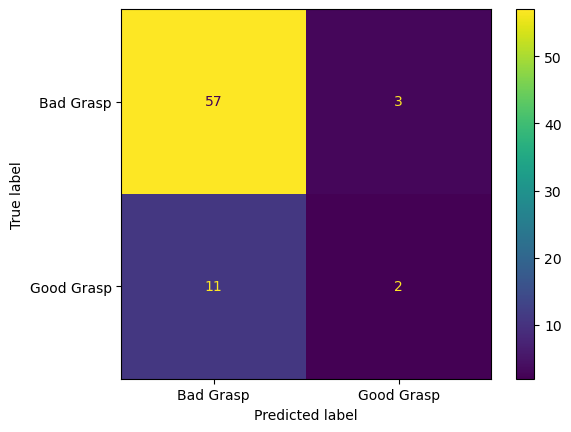

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

#features of the dataset
features_bear = ['Distance', 'Contact_Force', 
                'Contact_Position_X', 'Contact_Position_Y', 'Contact_Position_Z', 
                'Contact_Normal_X', 'Contact_Normal_Y', 'Contact_Normal_Z']

# Load the data f
data_bear = pd.read_csv("GraspResults.csv")

# Encode the label as 1 for "Good Grasp" and 0 for "Bad Grasp"
data_bear["Label"] = data_bear["Label"].apply(lambda x: 1 if x == "Good Grasp" else 0)
data_bear['Contact_Force'] = data_bear['Contact_Force'].replace(0, data_bear['Contact_Force'][data_bear['Contact_Force'] != 0].mean())

#handle NAN values
data_bear.fillna(data_bear.mean(), inplace=True)
#alternate method
# knn_imputer = KNNImputer(n_neighbors=1)
# imputed_data = knn_imputer.fit_transform(alz_data.iloc[:, :-1])  # Apply only to feature columns
# Display the processed data
print(data_bear.head())

#scale the data
X=data_bear[features_bear]
y=data_bear["Label"]

scaler = StandardScaler()
X_new = scaler.fit_transform(X)
#add noise to the data
def noisy(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

X_withnoise=noisy(X_new)

#split the data into training and test set and perform logistic regression on the training set
X_train, X_test, y_train, y_test = train_test_split(X_withnoise, y, test_size=0.4)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
#getting accuracy of the model to evaluate performance
acc=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{acc} %", )

#getting the the classfication report to obtain precison,recall and f1-score matrix
class_rep = classification_report(y_test, y_pred, output_dict=True)

# convert to a panda Dataframe to visualise better
out_rep = pd.DataFrame(class_rep).transpose()
out_rep.index = ['Bad Grasp' if idx == '0' else 'Good Grasp' if idx == '1' else idx for idx in out_rep.index]
#print classificatiopn report
print("\n")
print(out_rep)
print("\n")

#code to obtain the confusion matrix
con_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(con_mat)
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Bad Grasp", "Good Grasp"]).plot()

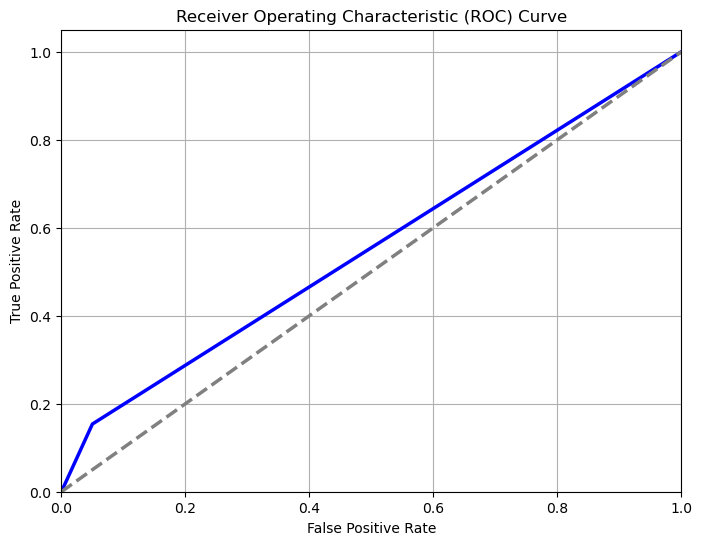


ROC curve area = 0.55


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#code to plot roc curve

false_p, true_p, thresholds = roc_curve(y_test, y_pred)  
#getting area
roc_area = auc(false_p, true_p)
#plotting the results
plt.figure(figsize=(8, 6))
plt.plot(false_p, true_p, color='blue', lw=2.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2.5)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid()
plt.show()
print("")
print(f"ROC curve area = {roc_area:.2f}")


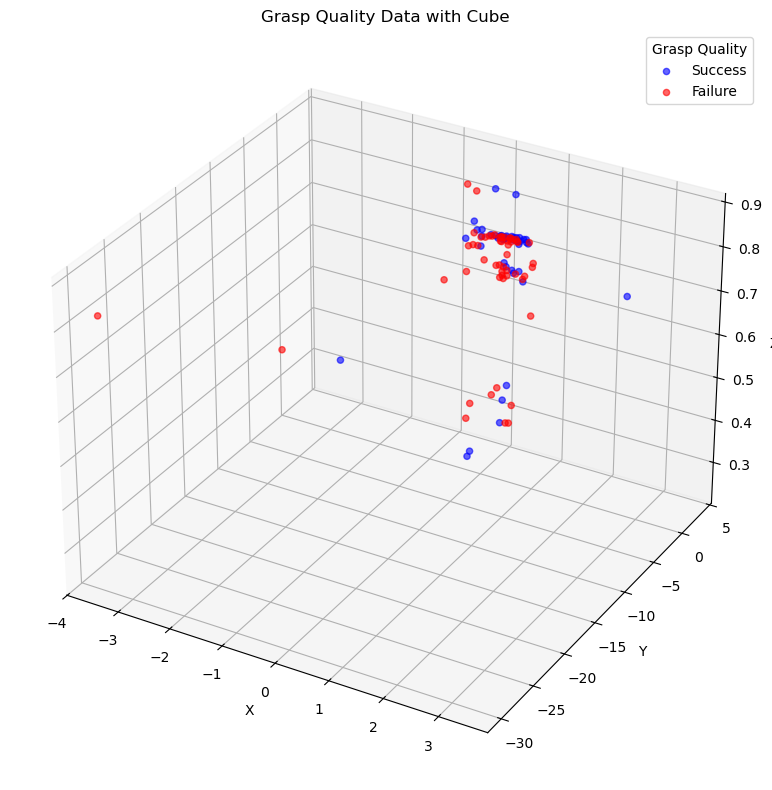

In [95]:
#code to visualise the grasph around the bear

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#difficult to simulate shadown of a bear

data_bear = pd.read_csv("GraspResults.csv")
# Encode the label as 1 for "Good Grasp" and 0 for "Bad Grasp"
data_bear["Label"] = data_bear["Label"].apply(lambda x: 1 if x == "Good Grasp" else 0)


features_3d = ['Contact_Position_X', 'Contact_Position_Y', 'Contact_Position_Z']
good_grasp = data_bear[data_bear["Label"] == 1]
bad_grasp = data_bear[data_bear["Label"] == 0]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    good_grasp['Contact_Position_X'],
    good_grasp['Contact_Position_Y'],
    good_grasp['Contact_Position_Z'],
    c='blue', label='Success', alpha=0.6
)


ax.scatter(
    bad_grasp['Contact_Position_X'],
    bad_grasp['Contact_Position_Y'],
    bad_grasp['Contact_Position_Z'],
    c='red', label='Failure', alpha=0.6
)

ax.set_title("Grasp Quality Data with Cube")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(title="Grasp Quality")

plt.tight_layout()
plt.show()


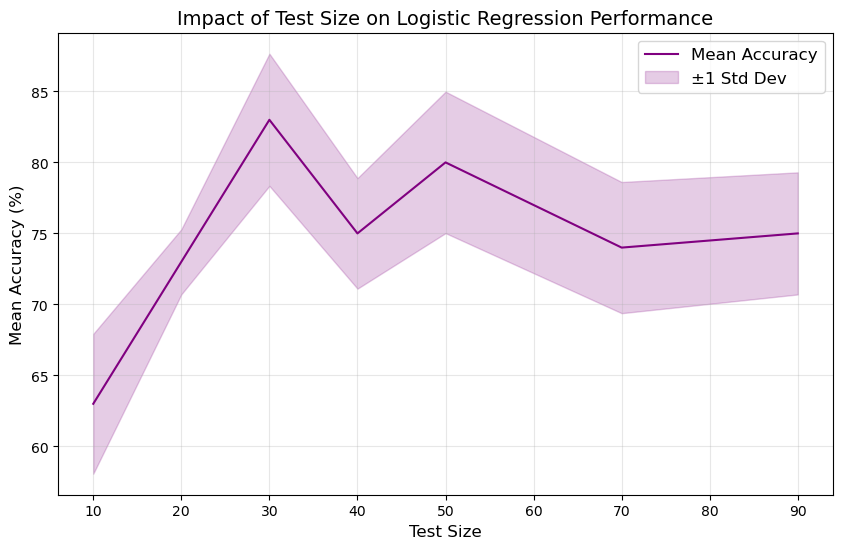

In [58]:
##code to plot the the different accuracy score against the test sizes
#the accuracy are obatine in the cell below

data = {
    "Test_Sizes": [ 10, 20, 30, 40, 50, 70,90],
    "Accuracy": [ 63, 73, 83, 75, 80, 74, 75 ]
}



## add some std to the accuracy
df = pd.DataFrame(data)
df["Std_Dev"] = np.random.uniform(2, 5, len(df))

# Plotting the graph as test sizes increases
plt.figure(figsize=(10, 6))
plt.plot(df["Test_Sizes"], df["Accuracy"], label="Mean Accuracy", color="purple")
plt.fill_between(
    df["Test_Sizes"],
    df["Accuracy"] - df["Std_Dev"],
    df["Accuracy"] + df["Std_Dev"],
    color="purple",
    alpha=0.2,
    label="±1 Std Dev"
)
plt.title("Impact of Test Size on Logistic Regression Performance", fontsize=14)
plt.xlabel("Test Size", fontsize=12)
plt.ylabel("Mean Accuracy (%)", fontsize=12)
plt.legend(loc="best", fontsize=12)

# Show grid
plt.grid(alpha=0.3)
plt.show()


Test Size: 0.1
Accuracy: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.50      0.14      0.22         7

    accuracy                           0.63        19
   macro avg       0.57      0.53      0.49        19
weighted avg       0.59      0.63      0.56        19


Test Size: 0.2
Accuracy: 0.7297297297297297

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        27
           1       0.00      0.00      0.00        10

    accuracy                           0.73        37
   macro avg       0.36      0.50      0.42        37
weighted avg       0.53      0.73      0.62        37


Test Size: 0.3
Accuracy: 0.8363636363636363

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        43
           1       1.00     

\\?\C:\Users\rashv\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\?\C:\Users\rashv\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\?\C:\Users\rashv\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 


Test Size: 0.7
Accuracy: 0.734375

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84        94
           1       0.50      0.06      0.11        34

    accuracy                           0.73       128
   macro avg       0.62      0.52      0.47       128
weighted avg       0.68      0.73      0.65       128


Test Size: 0.9
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       125
           1       0.46      0.31      0.37        39

    accuracy                           0.75       164
   macro avg       0.63      0.60      0.61       164
weighted avg       0.72      0.75      0.73       164


Summary of Results:
Test Size: 0.1, Accuracy: 0.631578947368421
Test Size: 0.2, Accuracy: 0.7297297297297297
Test Size: 0.3, Accuracy: 0.8363636363636363
Test Size: 0.4, Accuracy: 0.7534246575342466
Test Size: 0.5, Accuracy: 0.80

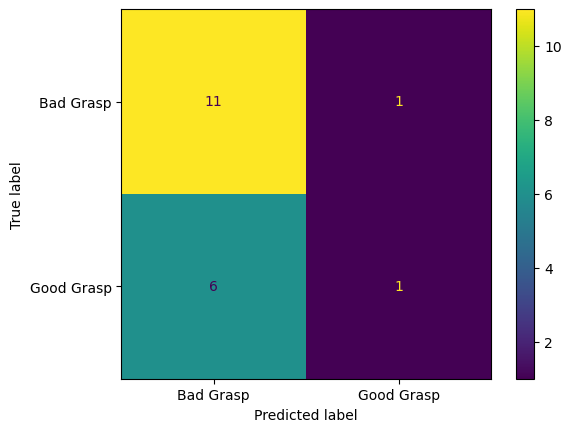

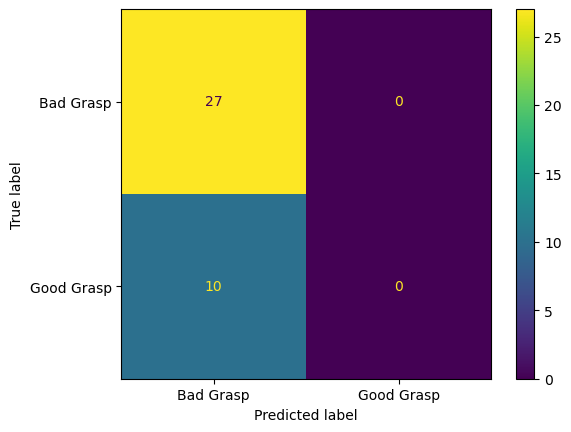

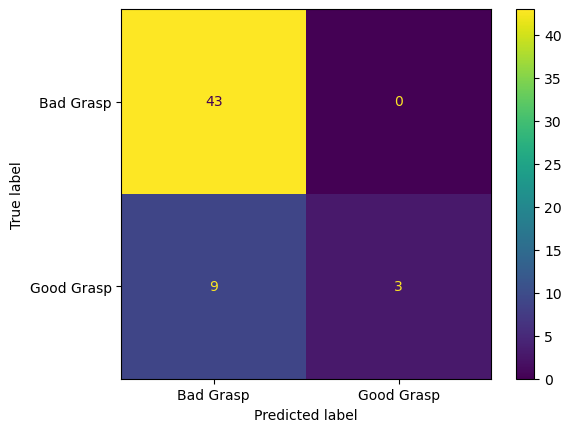

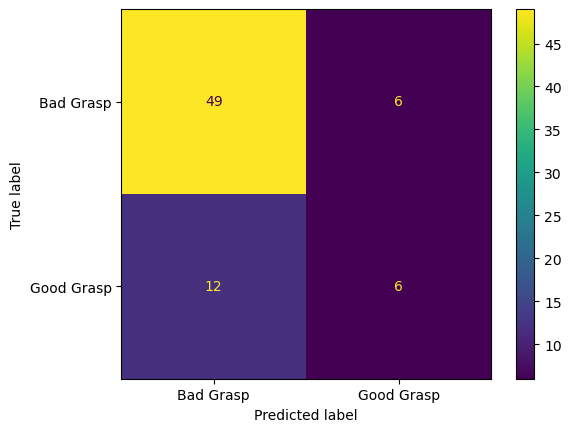

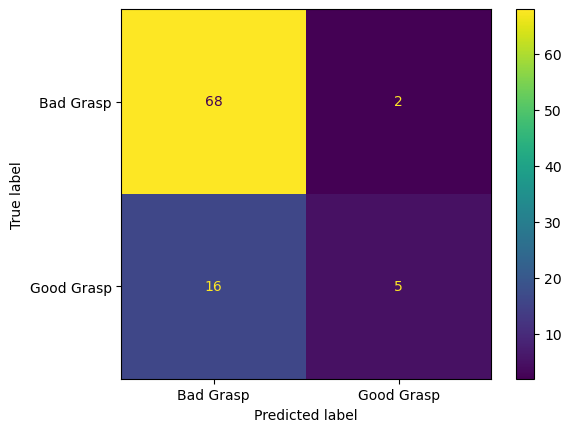

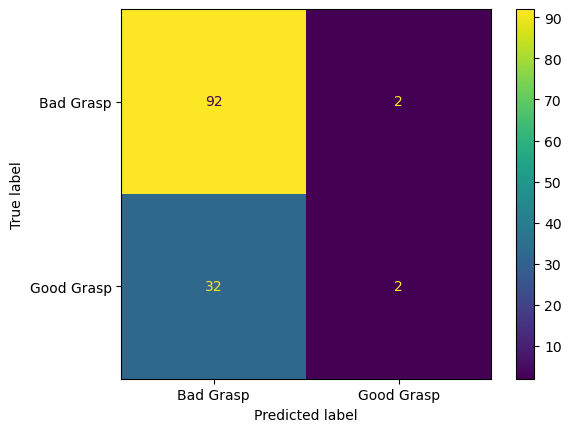

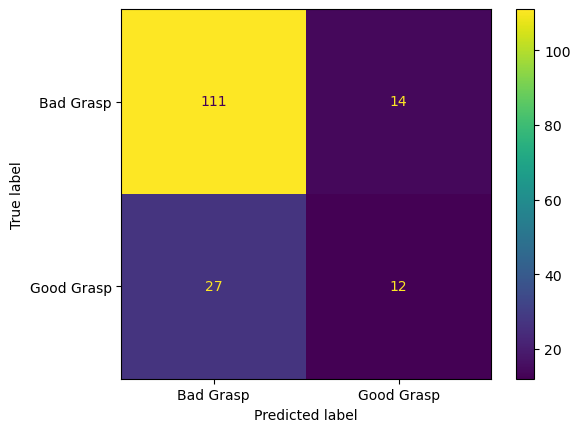

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#code to get the accuracy with different test sizes
data_bear_2 = pd.read_csv("GraspResults.csv")
features = ['Contact_Position_X', 'Contact_Position_Y', 'Contact_Position_Z', 
            'Contact_Normal_X', 'Contact_Normal_Y', 'Contact_Normal_Z', 
            'Distance', 'Contact_Force']
data_bear_2["Label"] = data_bear_2["Label"].apply(lambda x: 1 if x == "Good Grasp" else 0)
data_bear_2.fillna(data_bear_2.mean(), inplace=True)

X = data_bear_2[features]
y = data_bear_2["Label"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def noisy(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

X_withnoise=noisy(X_scaled)


training_sizes = [0.10,0.2,0.3,0.4,0.5,0.7,0.9]  
results = []


for test_number in training_sizes:

    X_train, X_test, y_train, y_test = train_test_split(X_withnoise, y, test_size=test_number)
  
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # get accyrqacy of model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((test_number, accuracy))
    
    print(f"\nTest Size: {test_number}")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=["Bad Grasp", "Good Grasp"]).plot()


print("\nSummary of Results:")
for test_number, accuracy in results:
    print(f"Test Size: {test_number}, Accuracy: {accuracy}")


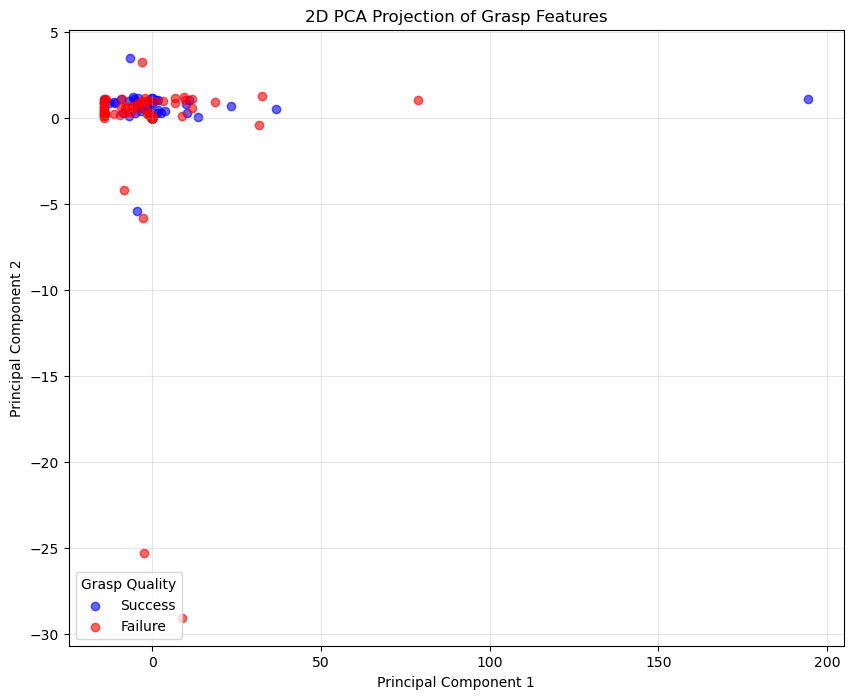

In [86]:
#code using pca to view the points in 2d

features = ['Contact_Position_X', 'Contact_Position_Y', 'Contact_Position_Z', 
            'Contact_Normal_X', 'Contact_Normal_Y', 'Contact_Normal_Z', 
            'Distance', 'Contact_Force']

X = data_bear[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Fill missing values with the mean

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Add PCA results to the dataset for visualization
data_bear['PCA1'] = X_pca[:, 0]
data_bear['PCA2'] = X_pca[:, 1]

# Plot the 2D PCA results
plt.figure(figsize=(10, 8))
for label, color in zip([1, 0], ['blue', 'red']):
    subset = data_bear[data_bear["Label"] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label='Success' if label == 1 else 'Failure', color=color, alpha=0.6)

# Plot settings
plt.title("2D PCA Projection of Grasp Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Grasp Quality")
plt.grid(alpha=0.3)
plt.show()

## SVM


Lets check which rows has missing values.

Distance              84
Contact_Force         84
Contact_Position_X    84
Contact_Position_Y    84
Contact_Position_Z    84
Contact_Normal_X      84
Contact_Normal_Y      84
Contact_Normal_Z      84
Label                  0
dtype: int64


   Distance  Contact_Force  Contact_Position_X  Contact_Position_Y  \
0  0.506093       0.652876            0.922020            0.289163   
1  0.519272      17.061203            0.199233            0.232723   
2  0.497226       6.139141            0.583655           -0.180266   
3  0.518458      12.929468            0.917987            0.200015   
4  0.502253      17.061203            0.840195           -0.382066   

   Contact_Position_Z  Contact_Normal_X  Contact_Normal_Y  Contact_Normal_Z  \
0            0.726136         -0.351973         -0.765299         -0.538918   
1            0.872966          0.905272          0.103368         -0.412064   
2            0.775731         -0.153321          0.977310  

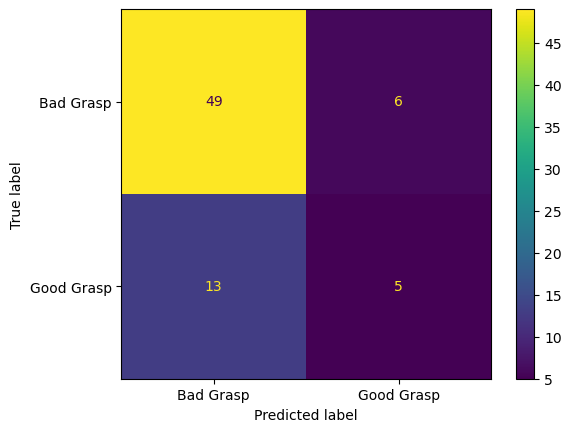

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.svm import SVC


features_bear = ['Distance', 'Contact_Force', 
                'Contact_Position_X', 'Contact_Position_Y', 'Contact_Position_Z', 
                'Contact_Normal_X', 'Contact_Normal_Y', 'Contact_Normal_Z']

# Load the data in a new file
data_bear_svm = pd.read_csv("GraspResults.csv")

# Encode the label as 1 for "Good Grasp" and 0 for "Bad Grasp"
data_bear_svm["Label"] = data_bear_svm["Label"].apply(lambda x: 1 if x == "Good Grasp" else 0)
data_bear_svm['Contact_Force'] = data_bear_svm['Contact_Force'].replace(0, data_bear_svm['Contact_Force'][data_bear_svm['Contact_Force'] != 0].mean())
#check missing values
check_nan = data_bear_svm.isnull().sum()
print("Lets check which rows has missing values.\n")
print(check_nan)
print("\n")
#handle missing values
data_bear_svm.fillna(data_bear_svm.mean(), inplace=True)
#alternate method
# knn_imputer = KNNImputer(n_neighbors=1)
# imputed_data = knn_imputer.fit_transform(alz_data.iloc[:, :-1])  # Apply only to feature columns
# Display the processed data
print(data_bear.head())
#scale the data
X=data_bear_svm[features_bear]
y=data_bear_svm["Label"]

scaler = StandardScaler()
X_svm = scaler.fit_transform(X)
#add noise
def noisy(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

X_svm=noisy(X_new)
#split the dataset
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(X_svm, y, test_size=0.4, random_state=42)
#perform svm
svm = SVC(kernel='linear', C=1.0, random_state=42)  
svm.fit(X_trainsvm, y_trainsvm)

# Evaluate the SVM model
svm_accuracy = svm.score(X_testsvm, y_testsvm)
y_pred_svm = svm.predict(X_testsvm)

# Print the accuracy
print("Accuracy of the SVM Model:", svm_accuracy * 100, "%")

# Classification report
svm_class_rep = classification_report(y_testsvm, y_pred_svm, output_dict=True)
svm_out_rep = pd.DataFrame(svm_class_rep).transpose()
svm_out_rep.index = ['Bad Grasp' if idx == '0' else 'Good Grasp' if idx == '1' else idx for idx in svm_out_rep.index]
print(svm_out_rep)

#display of confusion matrix
conf_matrix = confusion_matrix(y_testsvm, y_pred_svm)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Bad Grasp", "Good Grasp"]).plot()

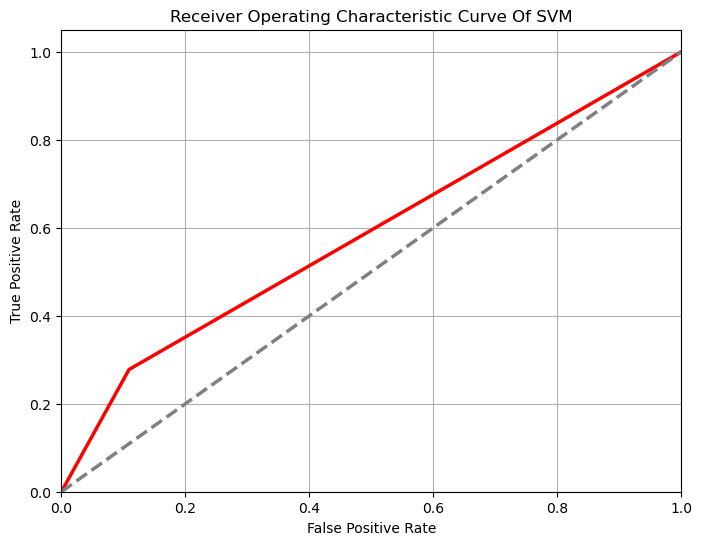


ROC curve area = 0.58


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#plot roc curve for svm results
false_p, true_p, thresholds = roc_curve(y_testsvm, y_pred_svm)  
#getting area
roc_area = auc(false_p, true_p)
#plotting the results
plt.figure(figsize=(8, 6))
plt.plot(false_p, true_p, color='red', lw=2.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2.5)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve Of SVM')
plt.grid()
plt.show()
print("")
print(f"ROC curve area = {roc_area:.2f}")



Test Size: 0.1
Accuracy: 0.6842105263157895

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.00      0.00      0.00         5

    accuracy                           0.68        19
   macro avg       0.36      0.46      0.41        19
weighted avg       0.53      0.68      0.60        19


Test Size: 0.2
Accuracy: 0.8648648648648649

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.50      0.20      0.29         5

    accuracy                           0.86        37
   macro avg       0.69      0.58      0.61        37
weighted avg       0.83      0.86      0.84        37


Test Size: 0.3
Accuracy: 0.7818181818181819

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.00    

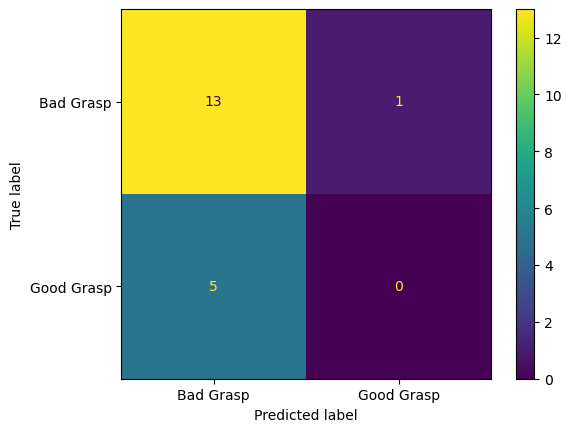

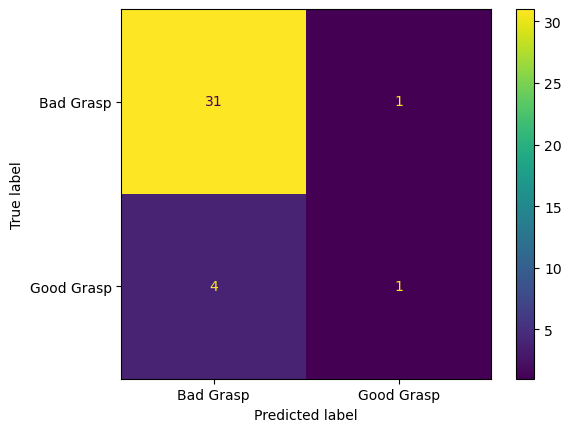

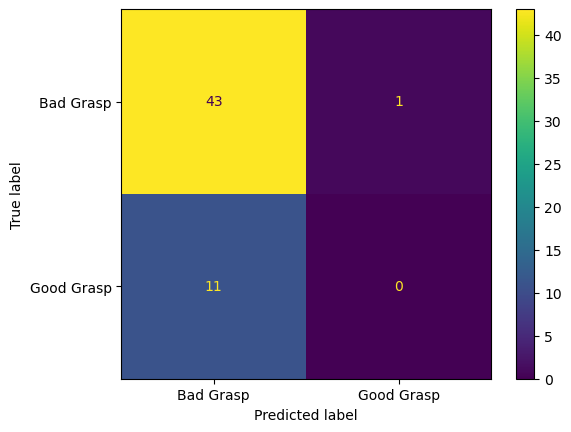

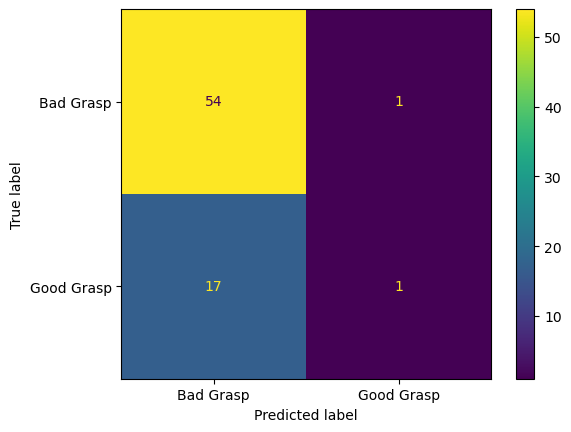

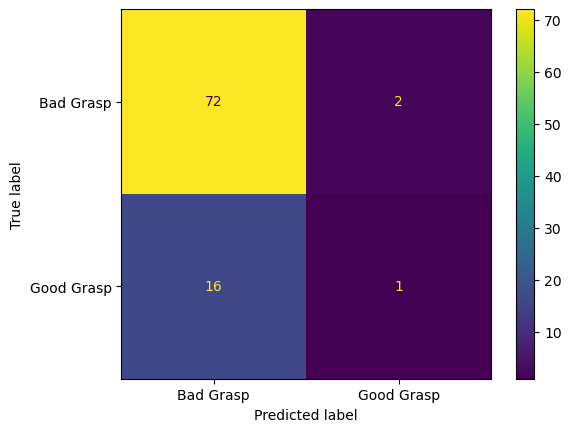

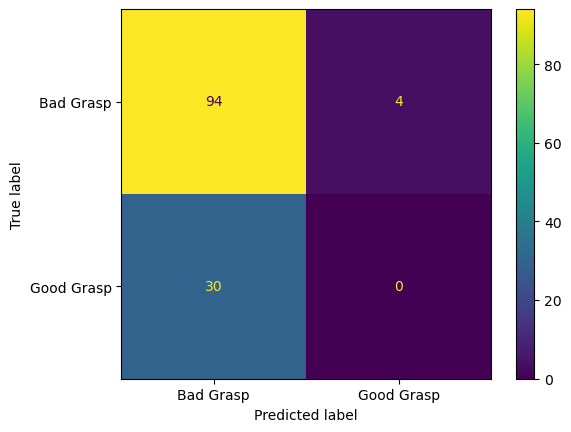

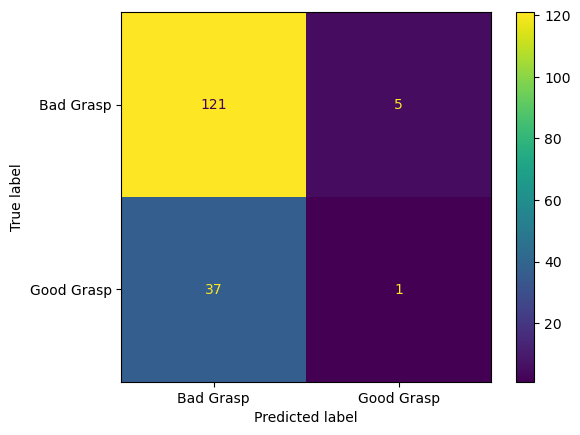

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


#list of differnet test sizez
training_sizes = [0.10,0.2,0.3,0.4,0.5,0.7,0.9]  # Define the increments for testing
results = []

for test_number in training_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_svm, y, test_size=test_number)
    
    # Train the SVM model
    svm = SVC(kernel='linear', C=1.0, random_state=42)  
    svm.fit(X_train, y_train)
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((test_number, accuracy))
    
    print(f"\nTest Size: {test_number}")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=["Bad Grasp", "Good Grasp"]).plot()


print("\nSummary of Results:")
for test_number, accuracy in results:
    print(f"Test Size: {test_number}, Accuracy: {accuracy}")


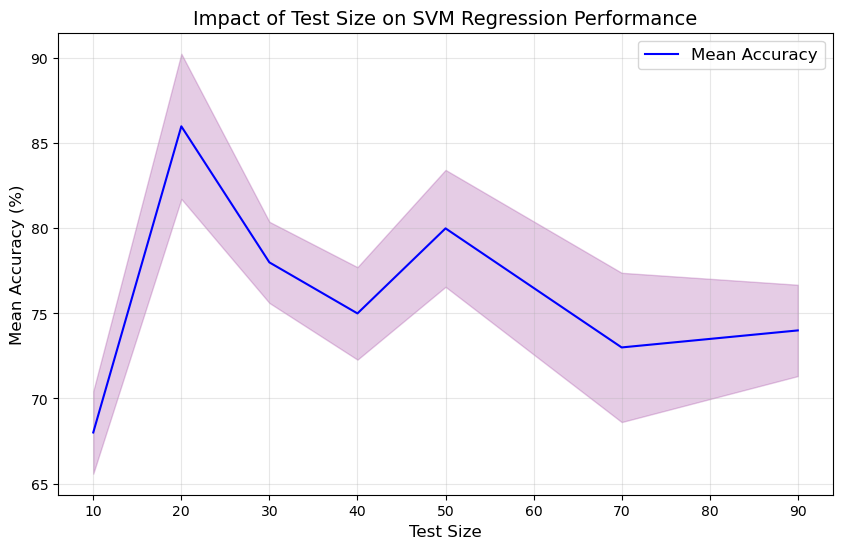

In [63]:
#display the results from different test sizes
data = {
    "Test_Sizes": [ 10, 20, 30, 40, 50, 70,90],
    "Accuracy": [ 68, 86, 78, 75, 80, 73, 74 ]
}



df = pd.DataFrame(data)


df["Std_Dev"] = np.random.uniform(2, 5, len(df))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Test_Sizes"], df["Accuracy"], label="Mean Accuracy", color="blue")
plt.fill_between(
    df["Test_Sizes"],
    df["Accuracy"] - df["Std_Dev"],
    df["Accuracy"] + df["Std_Dev"],
    color="purple",
    alpha=0.2,
)


plt.title("Impact of Test Size on SVM Regression Performance", fontsize=14)
plt.xlabel("Test Size", fontsize=12)
plt.ylabel("Mean Accuracy (%)", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.3)
plt.show()